# Lab Week 5 Task 2 Code
Code Accompanying the Chapter 6: Predictive Analytics with Ensemble Learning of the Book: **Artificial Intelligence with Python, Artasanchez, A., Joshi, P. (2020)**

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import shuffle


In [24]:
def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()


## Building a decision tree classifier

C:\Users\jko2\AppData\Local\Temp\ipykernel_15496\2869649642.py:12: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


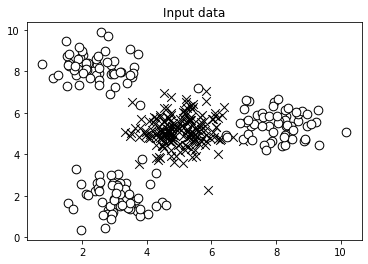

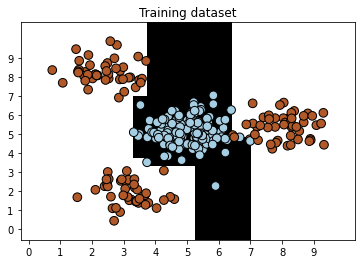

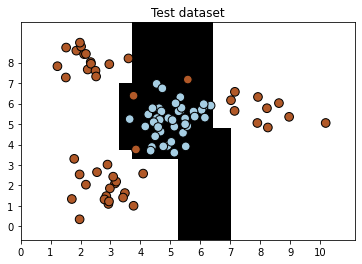


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

########################################



In [25]:
# Load input data
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Decision Trees classifier 
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


## Building random forest and extremely random forest classifiers
The book states to run the python file. 
For this cell you should simply provide the input though.

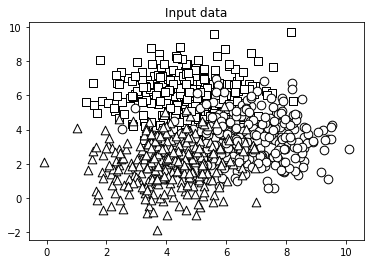

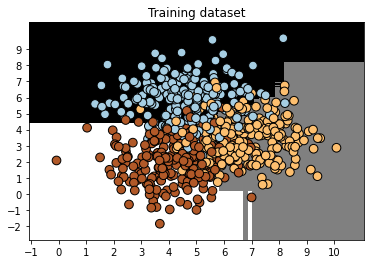

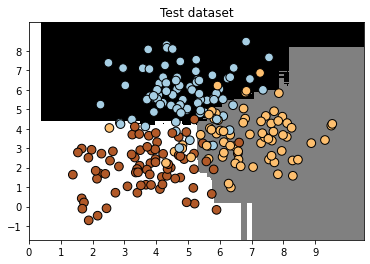


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

In [26]:

# Parse the input arguments
classifier_type = input("Enter the type of classifier (rf or erf): ")
assert classifier_type in ['rf', 'erf'], "Invalid classifier type"

# Load input data
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into three classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='^')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Ensemble Learning classifier
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)

classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1', 'Class-2']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")



Confidence measure:

Datapoint: [5 5]
Predicted class: Class-0

Datapoint: [3 6]
Predicted class: Class-0

Datapoint: [6 4]
Predicted class: Class-1

Datapoint: [7 2]
Predicted class: Class-1

Datapoint: [4 4]
Predicted class: Class-2

Datapoint: [5 2]
Predicted class: Class-2


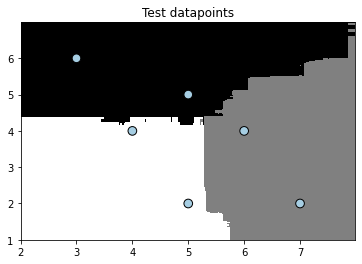

In [27]:
# Compute confidence
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('\nDatapoint:', datapoint)
    print('Predicted class:', predicted_class) 

# Visualize the datapoints
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 
        'Test datapoints')

plt.show()

## Dealing with class imbalance
Similar to the previous task, simply provide an input as to yes/no whether you want to account to for class imbalance.

C:\Users\jko2\AppData\Local\Temp\ipykernel_15496\3697862342.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


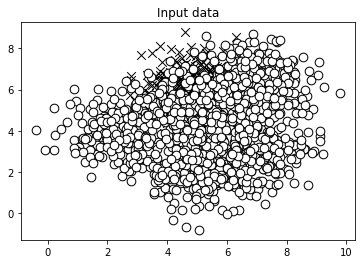

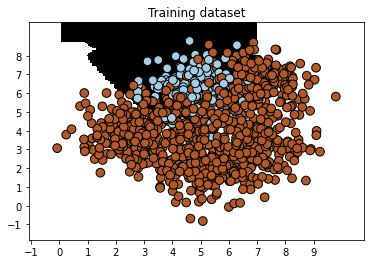

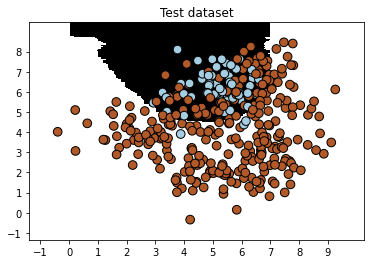


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375

########################################



In [28]:
# Load input data
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# custom code to parse the balance
balance = input("Type No if you do not want to account for class imbalance, else type Yes").lower()
assert balance in ('yes', 'no'), "Invalid input. Please enter Yes or No"
if balance == 'yes':
    balance = True
else:
    balance = False


# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
                edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Extremely Random Forests classifier


if not balance:
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
else:
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}

classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()


# Finding optimal training parameters using grid search

In [29]:

# Define the minimum and maximum values for X and Y
# that will be used in the mesh grid
def visualize_classifier(classifier, X, y):
  min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
  min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

print("\nLoad file")

# Load input data
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Separate input data into three classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

# Split the data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Define the parameter grid 
parameter_grid = [ {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
                   {'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}
                 ]

metrics = ['precision_weighted', 'recall_weighted']

for metric in metrics:
    print("\n##### Searching optimal parameters for", metric)

    classifier = GridSearchCV(
            ExtraTreesClassifier(random_state=0), 
            parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)
    
    print("\nGrid scores for the parameter grid:")
    for results in classifier.cv_results_:
        print(results)

    print("\nBest parameters:", classifier.best_params_)

    y_pred = classifier.predict(X_test)
    print("\nPerformance report:\n")
    print(classification_report(y_test, y_pred))


Load file

##### Searching optimal parameters for precision_weighted

Grid scores for the parameter grid:
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score

Best parameters: {'max_depth': 2, 'n_estimators': 100}

Performance report:

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


##### Searching optimal parameters for recall_weighted

Grid scores for the parameter grid:
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_n_estimators
params
spli

## Computing Relative Feature Importance

c:\Users\jko2\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d


ADABOOST REGRESSOR
Mean squared error = 22.7
Explained variance score = 0.79


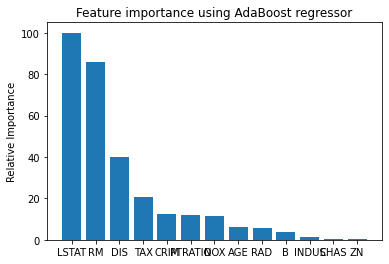

In [30]:

# Load housing data
housing_data = datasets.load_boston() 

# Shuffle the data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=7)

# AdaBoost Regressor model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
        n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Evaluate performance of AdaBoost regressor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# Extract feature importances
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

# Normalize the importance values 
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()



## Predicting traffic using an extremely random forest regressor

In [31]:
# Load input data
input_file = 'traffic_data.txt'
data = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        items = line[:-1].split(',')
        data.append(items)

data = np.array(data)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(data.shape)
for i, item in enumerate(data[0]):
    if item.isdigit():
        X_encoded[:, i] = data[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(data[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=5)

# Extremely Random Forests regressor
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
regressor = ExtraTreesRegressor(**params)
regressor.fit(X_train, y_train)

# Compute the regressor performance on test data
y_pred = regressor.predict(X_test)
print("Mean absolute error:", round(mean_absolute_error(y_test, y_pred), 2))

# Testing encoding on single data instance
test_datapoint = ['Saturday', '10:20', 'Atlanta', 'no']
test_datapoint_encoded = [-1] * len(test_datapoint)

# Predict the output for the test datapoint
print("Predicted traffic:", int(regressor.predict([test_datapoint_encoded])[0]))


Mean absolute error: 7.42
Predicted traffic: 6
